# Retrieval Augmented Generation
Retrieval-Augmented Generation (RAG) is a technique in Natural Language Processing (NLP) that combines the strengths of retrieval-based systems and generative models like GPT to produce more accurate, fact-based, and context-aware responses.
## What is RAG?
At its core, RAG augments a generative model with a retrieval component. Instead of relying solely on the model's internal knowledge (which may be outdated or incomplete), RAG retrieves relevant documents or snippets from an external knowledge base (like a database, documents, or a vector store) and uses them to inform the generation.


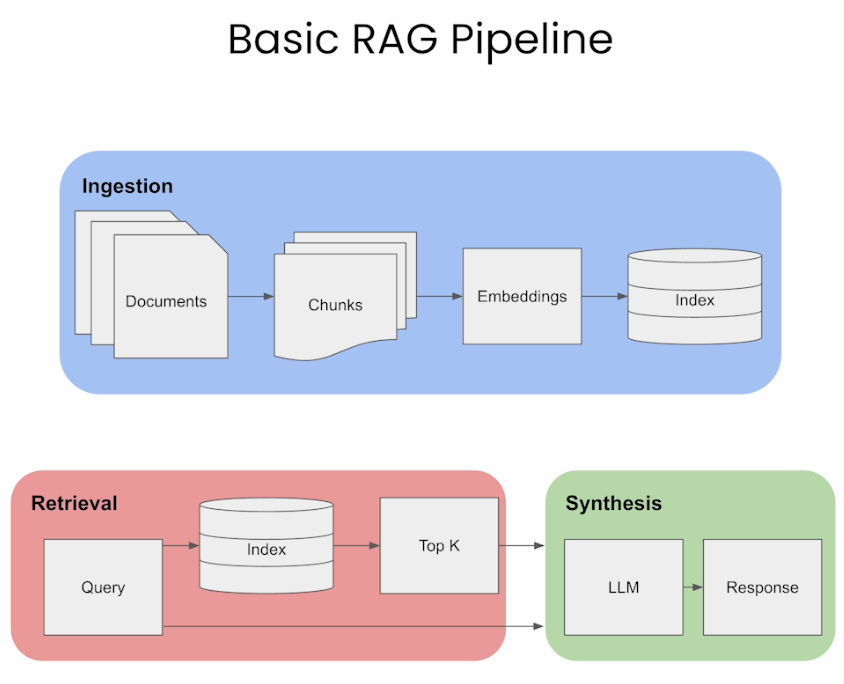

# LangChain
LangChain is an open-source framework that makes it easy to build applications powered by large language models (LLMs) like GPT-4 — especially those that involve retrieval, reasoning, chaining, and tool use.
## What Can LangChain Do?
LangChain helps developers create advanced LLM applications that can:
- Chain multiple LLM calls
- Retrieve information from documents (RAG)
- Use tools/APIs/agents
- Maintain conversation context
- Interact with memory
- Access the internet or private data

## Core Components of LangChain
1. LLMs and Chat Models
Connect with models like OpenAI, Anthropic, Cohere, or Hugging Face.

2. Prompts
Manage prompt templates, variables, and output parsers for structured responses.

3. Chains
Create pipelines that connect prompts, tools, and LLMs.
Example: Summarize → Retrieve → Answer Question.

4. Memory
Preserve chat history for applications like AI agents or chatbots.

5. Agents
Allow models to reason and choose tools (e.g., calculators, search APIs) dynamically.

6. Retrievers / VectorStores
Search and retrieve documents using embeddings (FAISS, Pinecone, Chroma, Weaviate, etc.) for RAG systems.


In [1]:
!pip install langchain

In [2]:
!pip install python-dotenv

In [3]:
!pip install langchain langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25


## Document Loading in LangChain
Document Loading is the first step in building applications like RAG (Retrieval-Augmented Generation) using LangChain. It involves reading and processing documents from various sources like PDFs, text files, websites, or databases into a format that can be embedded, indexed, and retrieved by your LLM pipeline.
## Common Loaders in LangChain
LangChain provides a wide range of document loaders out of the box:

| Source     | Loader Name                              | Example                |
| ---------- | ---------------------------------------- | ---------------------- |
| Text Files | `TextLoader`                             | `.txt` files           |
| PDFs       | `PyPDFLoader`, `PDFMinerLoader`          | `.pdf` files           |
| Web Pages  | `WebBaseLoader`, `UnstructuredURLLoader` | Load content from URLs |
| Notion     | `NotionDBLoader`                         | Load from Notion DBs   |
| CSV        | `CSVLoader`                              | `.csv` spreadsheets    |
| Markdown   | `UnstructuredMarkdownLoader`             | `.md` files            |
| HTML       | `UnstructuredHTMLLoader`                 | `.html` web content    |
| Email      | `UnstructuredEmailLoader`                | `.eml` files           |



## PDF Loader

In [4]:
! pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.6/304.6 kB 7.1 MB/s eta 0:00:00


In [6]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("/content/Salary_Slip[1].pdf") #add path of your document
pages = loader.load()

In [7]:
len(pages)

1

In [8]:
page = pages[0]

In [9]:
page

Document(metadata={'producer': 'SAP NetWeaver 701', 'creator': 'Form ZSAP_PAYSLIP_2 EN', 'creationdate': 'D:20240801231931', 'author': 'U80019707', 'source': '/content/Salary_Slip[1].pdf', 'total_pages': 1, 'page': 0, 'page_label': '1'}, page_content='Payslip For the Month of July 2024\n Personnel Number 80010807 Actual Basic / Base Pay 75,150\n Employee Name MALIK AZMAT HUSSAIN POC # 0074\n Department Bin Qasim -M&C-Corrective Cost Center 193061200\n Designation Complaint Coordinator Grade V\n Employee Group REGULAR Employee Sub-Group OFFICER\n Consumer No. LA493518 Account No. 0510905280072\n CNIC 42501-9393225-3 NTN\n Print Date 01.08.2024 User Name U80019707\n1001 Base Pay          75,150 \n2008 Conveyance Allowance           4,885 \n4001 LFA           6,268 \n4295 Phone Allowance           1,000 \nGross Payment and Allowances\nDeductions\n         87,303 \n3001 EFU Ins. Deduction           1,242 \n3002 EOBI Deductions             320 \n3500 Provident Fund Contribut.           4,88

In [10]:
print(page.page_content[0:500])

Payslip For the Month of July 2024
 Personnel Number 80010807 Actual Basic / Base Pay 75,150
 Employee Name MALIK AZMAT HUSSAIN POC # 0074
 Department Bin Qasim -M&C-Corrective Cost Center 193061200
 Designation Complaint Coordinator Grade V
 Employee Group REGULAR Employee Sub-Group OFFICER
 Consumer No. LA493518 Account No. 0510905280072
 CNIC 42501-9393225-3 NTN
 Print Date 01.08.2024 User Name U80019707
1001 Base Pay          75,150 
2008 Conveyance Allowance           4,885 
4001 LFA       


In [11]:
page.metadata['page']

0

## Text Loader

In [13]:
from langchain_community.document_loaders import TextLoader

In [14]:
loader = TextLoader("/content/docker-compose.yaml.txt")
data = loader.load()

In [15]:
len(data)

1

In [16]:
data

[Document(metadata={'source': '/content/docker-compose.yaml.txt'}, page_content='# Licensed to the Apache Software Foundation (ASF) under one\n# or more contributor license agreements.  See the NOTICE file\n# distributed with this work for additional information\n# regarding copyright ownership.  The ASF licenses this file\n# to you under the Apache License, Version 2.0 (the\n# "License"); you may not use this file except in compliance\n# with the License.  You may obtain a copy of the License at\n#\n#   http://www.apache.org/licenses/LICENSE-2.0\n#\n# Unless required by applicable law or agreed to in writing,\n# software distributed under the License is distributed on an\n# "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY\n# KIND, either express or implied.  See the License for the\n# specific language governing permissions and limitations\n# under the License.\n#\n\n# Basic Airflow cluster configuration for CeleryExecutor with Redis and PostgreSQL.\n#\n# WARNING: This configura

## Docs Loader

In [21]:
!pip install docx2txt

In [22]:
from langchain_community.document_loaders import Docx2txtLoader

In [23]:
loader = Docx2txtLoader("/content/Project Report.docx")
doc_data = loader.load()

In [24]:
doc_data

[Document(metadata={'source': '/content/Project Report.docx'}, page_content='NATIONAL UNIVERSITY\n\nof Computer and Emerging Sciences\n\n\n\nSecure Client Chat Application\n\nSPRING 25 SEMESTER PROJECT\n\nFAST School of Computing\n\nMAY 2025\n\n\n\n      By:\n\nM Ehtesham \n\n   Munawar Shereen\n\n\n\nApproved by:\n\nMiss Hira Tunio\n\n\n\n\n\n\nSecure Chat Application Project Report\n\n\n\nIntroduction\n\n\n\nThe Secure Chat Application is a project aimed at developing a private and secure messaging platform that ensures end-to-end encryption for message confidentiality. In today’s world, digital communication has become the backbone of personal and professional interactions, making security and privacy critical. This project addresses these concerns by implementing a robust, secure chat system with end-to-end encryption, ensuring only intended recipients can read the messages. This application uses Python for both server-side and client-side components, leveraging socket programming 

In [29]:
doc_data[0].metadata

{'source': '/content/Project Report.docx'}

## URLs (WebBaseLoader)

In [30]:
from langchain.document_loaders import WebBaseLoader

In [31]:
loader = WebBaseLoader("https://ehtesham-malik-portfolio.vercel.app/")

In [32]:
url_data = loader.load()

In [33]:
url_data

[Document(metadata={'source': 'https://ehtesham-malik-portfolio.vercel.app/', 'title': "Ehtesham's Portfolio", 'language': 'en'}, page_content="Ehtesham's Portfolio")]

In [37]:
print(url_data[0].page_content[:500])

Ehtesham's Portfolio
